In [1]:
pwd

'/root/code/rohito/RecommenDate/notebooks'

In [2]:
import pandas as pd
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import re
import string
from nltk.corpus import stopwords
import string
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize

In [3]:
data=pd.read_csv('/root/code/rohito/RecommenDate/RecommenDate/data/okcupid_profiles.csv')

In [4]:
data.head()

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9
0,22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,"asian, white",...,about me: i would love to think that i was so...,currently working as an international agent fo...,making people laugh. ranting about a good salt...,"the way i look. i am a six foot half asian, ha...","books: absurdistan, the republic, of mice and ...",food. water. cell phone. shelter.,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet! you are ti...
1,35,single,m,straight,average,mostly other,often,sometimes,working on space camp,white,...,i am a chef: this is what that means. 1. i am ...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories. my b...,NaN,NaN,i am very open and will share just about anyth...,NaN
2,38,available,m,straight,thin,anything,socially,NaN,graduated from masters program,NaN,...,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement conversation creation contemplation t...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ..."
3,23,single,m,straight,thin,vegetarian,socially,NaN,working on college/university,white,...,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . . lynch, jarmusch...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.
4,29,single,m,straight,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",...,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at: http://bagsbrown....,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians at the moment...",NaN,NaN,NaN,NaN,NaN


# Age, body type, education, jobs, pets and speaks

## Age

In [5]:
data.age.value_counts()

26     3724
27     3685
28     3583
25     3531
29     3295
24     3242
30     3149
31     2735
23     2592
32     2587
33     2206
22     1934
34     1902
35     1755
36     1583
37     1427
38     1330
21     1282
39     1172
42     1072
40     1030
41      980
20      953
43      858
44      708
45      643
19      611
46      578
47      529
48      481
49      459
50      437
51      350
52      344
18      309
56      271
54      267
55      265
57      256
53      252
59      221
58      197
60      195
61      176
62      167
63      138
64      113
65      109
66      105
67       66
68       59
69       31
110       1
109       1
Name: age, dtype: int64

In [6]:
data.age.isna().value_counts()

False    59946
Name: age, dtype: int64

### Nothing to work on age as there are no null values

## Body Type

In [7]:
data.body_type.value_counts()

average           14652
fit               12711
athletic          11819
thin               4711
curvy              3924
a little extra     2629
skinny             1777
full figured       1009
overweight          444
jacked              421
used up             355
rather not say      198
Name: body_type, dtype: int64

In [8]:
data.body_type.isna().value_counts()

False    54650
True      5296
Name: body_type, dtype: int64

In [9]:
data.body_type=data.body_type.fillna('rather not say')

## Education



In [10]:
data.education.value_counts()

graduated from college/university    23959
graduated from masters program        8961
working on college/university         5712
working on masters program            1683
graduated from two-year college       1531
graduated from high school            1428
graduated from ph.d program           1272
graduated from law school             1122
working on two-year college           1074
dropped out of college/university      995
working on ph.d program                983
college/university                     801
graduated from space camp              657
dropped out of space camp              523
graduated from med school              446
working on space camp                  445
working on law school                  269
two-year college                       222
working on med school                  212
dropped out of two-year college        191
dropped out of masters program         140
masters program                        136
dropped out of ph.d program            127
dropped out

In [11]:
data.education.isna().value_counts()

False    53318
True      6628
Name: education, dtype: int64

In [12]:
data.education=data.education.fillna('graduated from college/university').value_counts()

## Jobs

In [13]:
data.job.value_counts()

other                                7589
student                              4882
science / tech / engineering         4848
computer / hardware / software       4709
artistic / musical / writer          4439
sales / marketing / biz dev          4391
medicine / health                    3680
education / academia                 3513
executive / management               2373
banking / financial / real estate    2266
entertainment / media                2250
law / legal services                 1381
hospitality / travel                 1364
construction / craftsmanship         1021
clerical / administrative             805
political / government                708
rather not say                        436
transportation                        366
unemployed                            273
retired                               250
military                              204
Name: job, dtype: int64

In [14]:
data.job.isna().value_counts()

False    51748
True      8198
Name: job, dtype: int64

<AxesSubplot:>

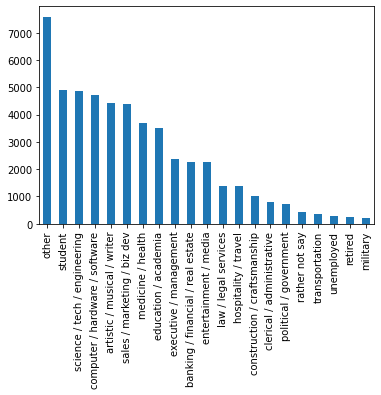

In [15]:
data.job.value_counts().plot(kind='bar')

In [16]:
data.job=data.job.fillna('other')

<AxesSubplot:>

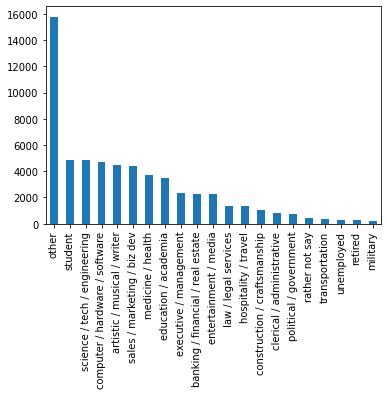

In [17]:
data.job.value_counts().plot(kind='bar')

## pets

In [18]:
data.pets.value_counts()

likes dogs and likes cats          14814
likes dogs                          7224
likes dogs and has cats             4313
has dogs                            4134
has dogs and likes cats             2333
likes dogs and dislikes cats        2029
has dogs and has cats               1474
has cats                            1406
likes cats                          1063
has dogs and dislikes cats           552
dislikes dogs and likes cats         240
dislikes dogs and dislikes cats      196
dislikes cats                        122
dislikes dogs and has cats            81
dislikes dogs                         44
Name: pets, dtype: int64

In [19]:
data.pets.isna().value_counts()

False    40025
True     19921
Name: pets, dtype: int64

In [20]:
data.pets=data.pets.fillna('likes dogs and likes cats')

In [21]:
data.pets.value_counts()

likes dogs and likes cats          34735
likes dogs                          7224
likes dogs and has cats             4313
has dogs                            4134
has dogs and likes cats             2333
likes dogs and dislikes cats        2029
has dogs and has cats               1474
has cats                            1406
likes cats                          1063
has dogs and dislikes cats           552
dislikes dogs and likes cats         240
dislikes dogs and dislikes cats      196
dislikes cats                        122
dislikes dogs and has cats            81
dislikes dogs                         44
Name: pets, dtype: int64

## speaks

In [22]:
data.speaks.value_counts()

english                                                                21828
english (fluently)                                                      6628
english (fluently), spanish (poorly)                                    2059
english (fluently), spanish (okay)                                      1917
english (fluently), spanish (fluently)                                  1288
                                                                       ...  
english (fluently), urdu (poorly), japanese (poorly), french (okay)        1
english, spanish, hindi, c++                                               1
english (fluently), japanese (okay), thai (okay), chinese (poorly)         1
english (fluently), french (okay), italian (okay), hebrew (okay)           1
english (fluently), french, farsi                                          1
Name: speaks, Length: 7647, dtype: int64

In [23]:
data.speaks.isna().value_counts()

False    59896
True        50
Name: speaks, dtype: int64

In [24]:
data.speaks=data.speaks.fillna('english')

In [25]:
data.speaks.value_counts()

english                                                                21878
english (fluently)                                                      6628
english (fluently), spanish (poorly)                                    2059
english (fluently), spanish (okay)                                      1917
english (fluently), spanish (fluently)                                  1288
                                                                       ...  
english (fluently), urdu (poorly), japanese (poorly), french (okay)        1
english, spanish, hindi, c++                                               1
english (fluently), japanese (okay), thai (okay), chinese (poorly)         1
english (fluently), french (okay), italian (okay), hebrew (okay)           1
english (fluently), french, farsi                                          1
Name: speaks, Length: 7647, dtype: int64

In [26]:
def clean (text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, ' ') # Remove Punctuation
    lowercased = text.lower() # Lower Case
    tokenized = word_tokenize(lowercased) # Tokenize
    words_only = [word for word in tokenized if word.isalpha()] # Remove numbers
    stop_words = set(stopwords.words('english')) # Make stopword list
    without_stopwords = [word for word in words_only if not word in stop_words] # Remove Stop Words
    lemma=WordNetLemmatizer() # Initiate Lemmatizer
    lemmatized = [lemma.lemmatize(word) for word in without_stopwords] # Lemmatize
    return lemmatized

In [27]:
def primary_language(text):
    primary_lang=[]
    number_of_languages=[]
    counter=0
    if 'fluently' in text:
        primary_lang.append(text[text.index('fluently')-1])
        counter=counter+1
    else:
        primary_lang.append(text[0])

    if 'poorly' in text:
        counter=counter+1
    if 'okay' in text:
        counter=counter+1
    number_of_languages.append(len(text)-counter)
    return primary_lang,number_of_languages

In [28]:
data['speaks_cleaned']=data.speaks.apply(lambda x:clean(x))

In [29]:
data['primary_language']=data.speaks_cleaned.apply(lambda x:primary_language(x)).apply(pd.Series)[0]

In [30]:
data['number_of_languages']=data.speaks_cleaned.apply(lambda x:primary_language(x)).apply(pd.Series)[1]

In [31]:
data.primary_language=data.primary_language.apply(lambda x:''.join(x))

In [32]:
data.number_of_languages=data.number_of_languages.apply(lambda x: x[0])

# Essays

In [33]:
data['essay0']=data['essay0'].fillna('')
data['essay0_cleaned']=data['essay0'].apply(lambda x:clean(x))
data['essay0_cleaned']=data['essay0_cleaned'].apply(lambda x:' '.join(x))

In [34]:
data['essay1']=data['essay1'].fillna('')
data['essay1_cleaned']=data['essay1'].apply(lambda x:clean(x))
data['essay1_cleaned']=data['essay1_cleaned'].apply(lambda x:' '.join(x))

In [35]:
data['essay2']=data['essay2'].fillna('')
data['essay2_cleaned']=data['essay2'].apply(lambda x:clean(x))
data['essay2_cleaned']=data['essay2_cleaned'].apply(lambda x:' '.join(x))

In [36]:
data['essay3']=data['essay3'].fillna('')
data['essay3_cleaned']=data['essay3'].apply(lambda x:clean(x))
data['essay3_cleaned']=data['essay3_cleaned'].apply(lambda x:' '.join(x))

In [37]:
data['essay4']=data['essay4'].fillna('')
data['essay4_cleaned']=data['essay4'].apply(lambda x:clean(x))
data['essay4_cleaned']=data['essay4_cleaned'].apply(lambda x:' '.join(x))

In [38]:
data['essay5']=data['essay5'].fillna('')
data['essay5_cleaned']=data['essay5'].apply(lambda x:clean(x))
data['essay5_cleaned']=data['essay5_cleaned'].apply(lambda x:' '.join(x))

In [39]:
data['essay6']=data['essay6'].fillna('')
data['essay6_cleaned']=data['essay6'].apply(lambda x:clean(x))
data['essay6_cleaned']=data['essay6_cleaned'].apply(lambda x:' '.join(x))

In [40]:
data['essay7']=data['essay7'].fillna('')
data['essay7_cleaned']=data['essay7'].apply(lambda x:clean(x))
data['essay7_cleaned']=data['essay7_cleaned'].apply(lambda x:' '.join(x))

In [41]:
data['essay8']=data['essay8'].fillna('')
data['essay8_cleaned']=data['essay8'].apply(lambda x:clean(x))
data['essay8_cleaned']=data['essay8_cleaned'].apply(lambda x:' '.join(x))

In [42]:
data['essay9']=data['essay9'].fillna('')
data['essay9_cleaned']=data['essay9'].apply(lambda x:clean(x))
data['essay9_cleaned']=data['essay9_cleaned'].apply(lambda x:' '.join(x))

In [43]:
data['essay']=data['essay0_cleaned']+data['essay1_cleaned']+data['essay2_cleaned']+data['essay3_cleaned']+data['essay4_cleaned']+data['essay5_cleaned']+data['essay6_cleaned']
+data['essay6_cleaned']+data['essay7_cleaned']+data['essay8_cleaned']+data['essay9_cleaned']

0        duality humorous thingtrying find someone hang...
1                                      open share anything
2        viewing listening dancing talking drinking per...
3                       cat german philosophyfeel inclined
4                                                         
                               ...                        
59941    writing bookrunning dog finishing work week lo...
59942    thinking bus work usually seat across smell li...
59943    aside work improve homeenjoying friendly conve...
59944    make someone chucklewould day everydays friday...
59945    sex people amazing everything fucked everythin...
Length: 59946, dtype: object

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
n_components=10
vectorizer = CountVectorizer(max_df=0.5,ngram_range=(2,2))

data_vectorized = vectorizer.fit_transform(data['essay'].iloc[:10000])

lda_model = LatentDirichletAllocation(n_components=n_components,max_iter=300,n_jobs=-2)

lda_vectors = lda_model.fit_transform(data_vectorized)

In [ ]:
document_mixture=pd.DataFrame(lda_vectors,columns=[f"topic{i+1}" for i in range(n_components)],
                              index=data.essay0_cleaned.iloc[:10000])
document_mixture

In [ ]:
topic_mixture=pd.DataFrame(lda_model.components_,columns=vectorizer.get_feature_names_out(),index=[f"topic{i+1}" for i in range(n_components)])

In [ ]:
topic_mixture.loc["topic1"].sort_values(ascending=False)